### Text in Data Visualization
- Title : 가장 큰 주제 설명
- Label : 축에 해당하는 데이터 정보를 제공
- Tick Label : 축에 눈금을 사용하여 스케일 정보 추가
- Legend : 한 그래프에서 2개 이상의 서로 다른 데이터를 분류하기 위하여 사용하는 보조 정보
- Annotation(Text) : 그 외의 시각화에 대한 설명 추가

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

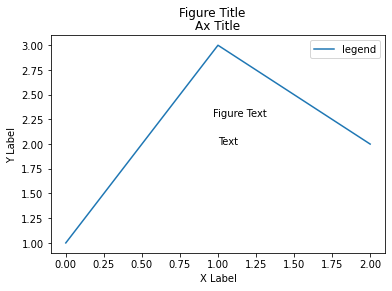

In [2]:
fig, ax = plt.subplots()

fig.suptitle('Figure Title')

ax.plot([1, 3, 2], label='legend')
ax.legend()

ax.set_title('Ax Title')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

ax.text(x=1,y=2, s='Text') # 좌표
fig.text(0.5, 0.6, s='Figure Text') # 비율

plt.show()

### Text Properties
#### Font Components
- family
- size or fontsize
- style or fontstyle
- weight or fontweight

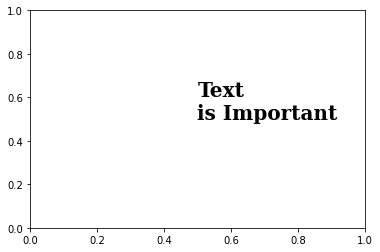

In [6]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
       )


plt.show()

### Details
- color
- linespacing
- backgroundcolor
- alpha
- zorder
- visible

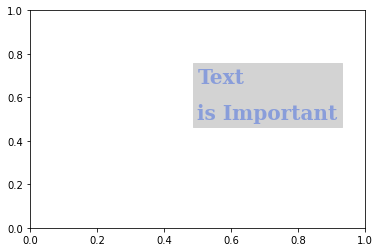

In [11]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        backgroundcolor='lightgray',
        alpha=0.5
       )


plt.show()

### Alignment
- ha : horizontal alignment
- va : vertical alignment
- rotation
- multialignment

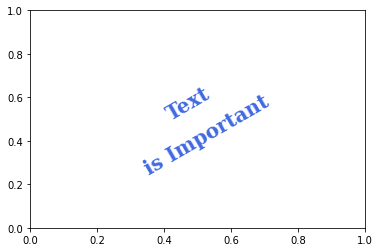

In [17]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation='30' # horizontal, vertical, number
       )


plt.show()

### Advanced
- bbox

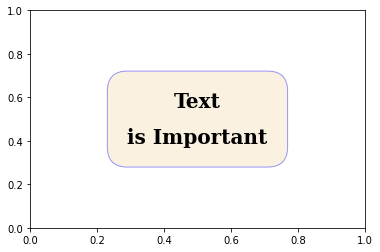

In [19]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='black',
        linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation='horizontal', # vertical?
        bbox=dict(boxstyle='round', facecolor='wheat', ec='blue',
        pad=1,
        alpha=0.4)
       )


plt.show()

In [20]:
student = pd.read_csv('data/exams.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,some high school,standard,completed,69,63,62
1,female,group D,bachelor's degree,free/reduced,completed,58,73,76
2,male,group C,bachelor's degree,standard,none,56,47,48
3,female,group D,associate's degree,free/reduced,none,69,80,83
4,female,group A,some college,standard,none,70,79,72


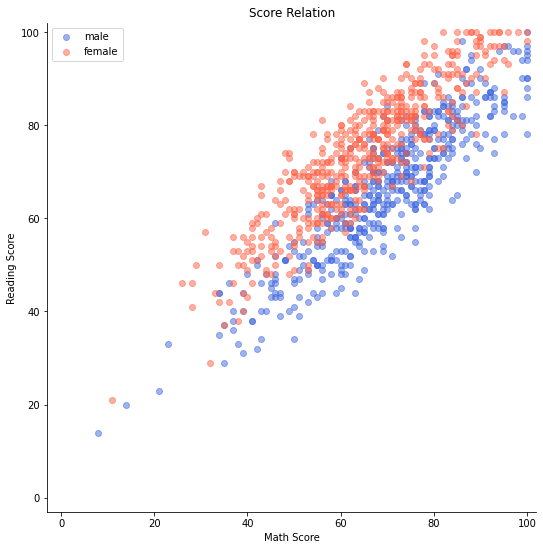

In [21]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 
ax.legend()   

plt.show()

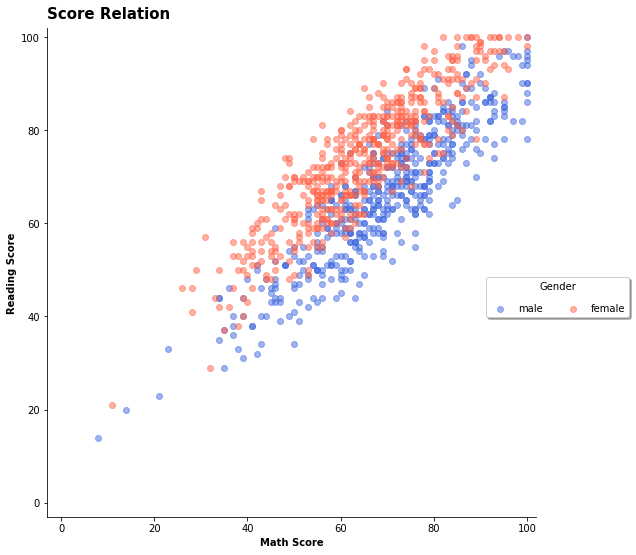

In [26]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score', 
              fontweight='semibold')
ax.set_ylabel('Reading Score', 
              fontweight='semibold')

ax.set_title('Score Relation', 
             loc='left', va='bottom',
             fontweight='bold', fontsize=15
            )

ax.legend(
    title='Gender',
    shadow=True,
    labelspacing=1.2,
    # loc='lower right',
    bbox_to_anchor=[1.2, 0.5],
    # ncol=2,
    # nrow=2
)

plt.show()

In [27]:
def score_band(x):
    tmp = (x+9)//10
    if tmp <= 1: 
        return '0 - 10'
    return f'{tmp*10-9} - {tmp*10}'

student['math-range'] = student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

0 - 10        1
11 - 20       2
21 - 30       6
31 - 40      36
41 - 50      91
51 - 60     185
61 - 70     268
71 - 80     224
81 - 90     126
91 - 100     61
Name: math-range, dtype: int64

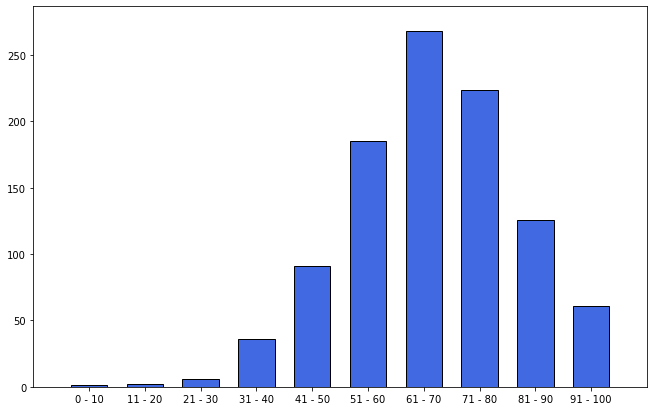

In [28]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.07)
plt.show()

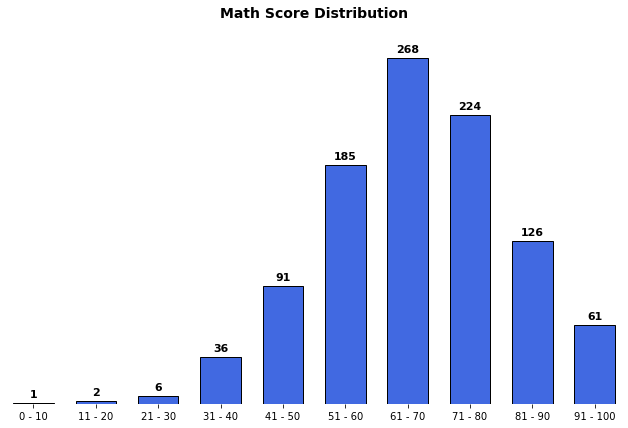

In [29]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.01, 0.1)
ax.set(frame_on=False)
ax.set_yticks([])
ax.set_xticks(np.arange(len(math_grade)))
ax.set_xticklabels(math_grade.index)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

for idx, val in math_grade.iteritems():
    ax.text(x=idx, y=val+3, s=val,
            va='bottom', ha='center',
            fontsize=11, fontweight='semibold'
           )

plt.show()

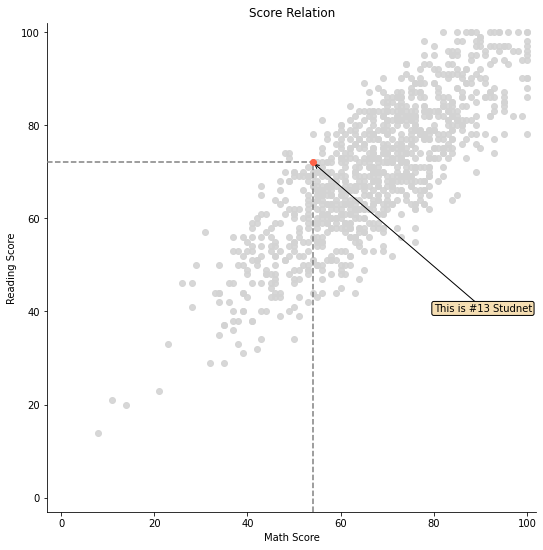

In [30]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = 13

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9, zorder=5)
    
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1, zorder=10)    
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 

# x축과 평행한 선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--',
        zorder=8)

# y축과 평행한 선
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
       color='gray', linestyle='--',
       zorder=8)

bbox = dict(boxstyle="round", fc='wheat', pad=0.2)
arrowprops = dict(
    arrowstyle="->")

ax.annotate(text=f'This is #{i} Studnet',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[80, 40],
            bbox=bbox,
            arrowprops=arrowprops,
            zorder=9
           )

plt.show()